In [1]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sys
import pickle
from sklearn.utils import resample
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from xgboost import plot_importance


In [2]:
sys_path = sys.path[0].split("/")[:-1]
sys_path
path_df = "/".join(sys_path) + "/csvs/" + "politifact_global_feature.pkl"

In [57]:
df = pickle.load(open(path_df, "rb"))

In [19]:
len(df[df["target"] == 0])

156

In [20]:
len(df[df["target"] == 1])

156

In [12]:
arr_source = pickle.load(open("/Users/admin/PycharmProjects/fake_news_detection/fake_news_detection/pickle/classifierspolitifact_structural_temporal_linguistic_textual_graphical.pkl", "rb"))

In [13]:
search_res = list(
            filter(lambda item: item["name"] == "classifierspolitifact_structural_temporal_linguistic.pkl", arr_source))

In [14]:
search_res

[{'classifier': 'GaussianNB',
  'model': GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
               param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                             1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                             1e-12, 1e-13, 1e-14, 1e-15]},
               scoring='roc_auc', verbose=True),
  'accuracy': 0.7619047619047619,
  'precision': 1.0,
  'recall': 0.53125,
  'f1_score': 0.6938775510204082,
  'roc_auc': 0.765625,
  'news_source': 'politifact',
  'best_param': {'var_smoothing': 0.0001},
  'best_score': 0.7585685483870968,
  'best_estimator': GaussianNB(var_smoothing=0.0001),
  'best_index': 2,
  'pred': array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]),
  'name': 'classifierspolitifact_structural_temporal_linguistic.pkl'},
 {'classi

In [16]:
for cl in class_arrs:
    print(cl["classifier"])
    print(cl["f1_score"])
    print(cl["accuracy"])

GaussianNB
0.72
0.7777777777777778
LogisticRegression
0.8
0.8253968253968254
DecisionTreeClassifier
0.7575757575757576
0.746031746031746
RandomForestClassifier
0.8135593220338982
0.8253968253968254
SVM -linear kernel
0.7692307692307693
0.8095238095238095
LGBMClassifier
0.8387096774193549
0.8412698412698413
XGBClassifier
0.84375
0.8412698412698413


In [58]:
df.head()

,text,title,top_img,publish_date,images,source,target,tweet_mod,comp_text,lem_text,...,Sen15,Sen16,Sen17,Sen18,Sen19,G1,G2,G3,G4,G5
id,,,,,,,,,,,,,,,,,,,,,
politifact720,Organizing for ’18\n\nThrough Election Day\n\n...,Organizing for Action,https://secure.assets.bostatic.com/apps/quincy...,None,[https://secure.assets.bostatic.com/apps/quinc...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",Organizing for 18 Through Election Day Sometim...,organize for 18 through election day sometimes...,...,0.949437,0.034845,0.071476,1.681818,0.011628,0.012289,79.0,86.0,1.866903e-04,85.0
politifact10731,"COLUMBUS, Ohio — America's role as a world lea...",Call 'Islamic terrorism' what it is: a threat ...,http://triblive.com/csp/mediapool/sites/dt.com...,1429079762.0,[http://triblive.com/csp/mediapool/sites/TribL...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",COLUMBUS Ohio America's role as a world leader...,columbus ohio americas role a a world leader a...,...,0.694333,0.000000,-0.738400,1.250000,0.041667,0.046498,20.0,24.0,3.071834e-03,23.0
politifact11115,"In the course of the email review, State Depar...",Inquiry Sought in Hillary Clinton’s Use of Email,https://static01.nyt.com/images/2015/07/24/us/...,1437721200.0,[https://static01.nyt.com/images/2015/07/24/us...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",In the course of the email review State Depart...,in the course of the email review state depart...,...,0.778346,0.012754,-0.472698,1.156863,0.000543,0.000609,1673.0,1842.0,5.721557e-07,1841.0
politifact14148,We all get lazy from time to time and just wan...,NASA Will Pay You 18000 USD To Stay In Bed And...,http://reflectionofmind.org/wp-content/uploads...,1482942009.0,[http://reflectionofmind.org/wp-content/upload...,politifact,0,"[{'time': None, 'type': 1, 'user': 1716929114,...",We all get lazy from time to time and just wan...,we all get lazy from time to time and just wan...,...,0.829039,0.098993,0.134468,1.240000,0.000836,0.000885,1089.0,1196.0,1.024639e-06,1195.0
politifact6932,"Mitt Romney came to coal country on Aug. 14, s...",Barack Obama says Mitt Romney condemned coal-f...,http://static.politifact.com.s3.amazonaws.com/...,1345705200.0,[http://metric.politifact.com/b/ss/spttbglobal...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",Mitt Romney came to coal country on Aug. 14 st...,mitt romney come to coal country on aug 14 sta...,...,0.642184,0.016658,-0.765808,1.000000,0.025000,0.025214,38.0,40.0,6.738988e-04,39.0


In [44]:
df.iloc[:, 10:70]

,S10,S11,S12,S13,S14,S1,S2,S3,S4,S5,...,Tex15,Tex16,Tex17,Tex18,Tex19,G1,G2,G3,G4,G5
id,,,,,,,,,,,,,,,,,,,,,
politifact720,2.0,72.0,0.0,0.0,0.000000,4.0,86.0,8.0,71.0,1.0,...,0.949437,0.034845,0.071476,1.681818,0.011628,0.012289,79.0,86.0,1.866903e-04,85.0
politifact10731,2.0,16.0,0.0,0.0,0.000000,3.0,24.0,6.0,15.0,1.0,...,0.694333,0.000000,-0.738400,1.250000,0.041667,0.046498,20.0,24.0,3.071834e-03,23.0
politifact11115,6.0,1416.0,22.0,41.0,0.032958,6.0,1676.0,44.0,1244.0,1.0,...,0.778346,0.012754,-0.472698,1.156863,0.000543,0.000609,1673.0,1842.0,5.721557e-07,1841.0
politifact14148,6.0,1073.0,3.0,30.0,0.029674,5.0,1135.0,14.0,1011.0,1.0,...,0.829039,0.098993,0.134468,1.240000,0.000836,0.000885,1089.0,1196.0,1.024639e-06,1195.0
politifact6932,3.0,40.0,1.0,1.0,0.026316,2.0,39.0,0.0,38.0,0.0,...,0.642184,0.016658,-0.765808,1.000000,0.025000,0.025214,38.0,40.0,6.738988e-04,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
politifact7511,3.0,41.0,3.0,1.0,0.027027,3.0,46.0,7.0,37.0,1.0,...,0.974568,0.020811,0.048792,1.000000,0.020408,0.021967,46.0,49.0,6.200397e-04,48.0
politifact160,5.0,100.0,2.0,14.0,0.179487,4.0,168.0,15.0,78.0,1.0,...,0.898974,0.066462,0.125088,1.166667,0.005319,0.006446,140.0,188.0,7.088345e-05,187.0
politifact13443,3.0,37.0,1.0,1.0,0.028571,4.0,45.0,2.0,35.0,2.0,...,0.985314,0.006886,-0.003757,1.642857,0.021739,0.023510,38.0,46.0,7.622115e-04,45.0


In [59]:
X = pd.DataFrame(df.iloc[:, 10:70], columns=df.columns[10:70])
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [60]:
X_train

,S10,S11,S12,S13,S14,S1,S2,S3,S4,S5,...,Sen15,Sen16,Sen17,Sen18,Sen19,G1,G2,G3,G4,G5
id,,,,,,,,,,,,,,,,,,,,,
politifact15191,6.0,1400.0,138.0,68.0,0.090546,9.0,1696.0,72.0,751.0,1.0,...,0.686246,0.008679,-0.665975,1.033175,0.000427,0.000541,1920.0,2344.0,6.274607e-07,2343.0
politifact15540,3.0,130.0,6.0,11.0,0.099099,10.0,159.0,6.0,111.0,7.0,...,0.627108,0.007730,-0.871060,1.081081,0.005650,0.006606,147.0,177.0,1.375222e-04,176.0
politifact8846,6.0,592.0,2.0,17.0,0.030195,7.0,935.0,14.0,563.0,1.0,...,0.959377,0.036915,0.098330,1.422330,0.001042,0.001204,759.0,960.0,2.503132e-06,959.0
politifact13687,6.0,2726.0,204.0,99.0,0.129751,10.0,2165.0,69.0,763.0,1.0,...,0.669855,0.001823,-0.819502,1.057416,0.000242,0.000328,3238.0,4126.0,2.864836e-07,4125.0
politifact12945,3.0,70.0,7.0,2.0,0.034483,6.0,197.0,23.0,58.0,1.0,...,0.997966,0.002034,0.007267,1.076923,0.004808,0.006223,163.0,208.0,8.796543e-05,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
politifact15327,2.0,2.0,0.0,0.0,0.000000,3.0,10.0,8.0,1.0,1.0,...,0.500000,0.236000,-0.102700,0.000000,0.100000,0.129630,8.0,10.0,3.086420e-02,9.0
politifact13589,6.0,1383.0,142.0,91.0,0.100110,6.0,1211.0,57.0,909.0,1.0,...,0.982172,0.006080,-0.016893,1.084848,0.000595,0.000702,1391.0,1681.0,9.086398e-07,1680.0
politifact3198,6.0,2800.0,143.0,125.0,0.068946,9.0,3538.0,71.0,1813.0,1.0,...,0.899343,0.082082,0.165842,1.186667,0.000222,0.000271,3948.0,4512.0,1.339320e-07,4511.0


<BarContainer object of 20 artists>

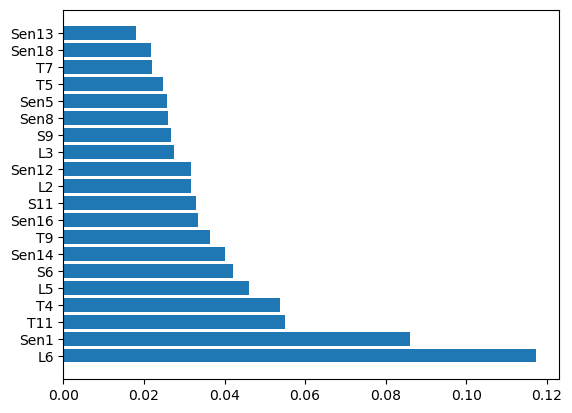

In [61]:
n_top_features = 20
sorted_idx = class_arrs[-1]["best_estimator"].feature_importances_.argsort()[::-1]
plt.barh(X_test.columns[sorted_idx][:n_top_features ], class_arrs[-1]["best_estimator"].feature_importances_[sorted_idx][:n_top_features ])

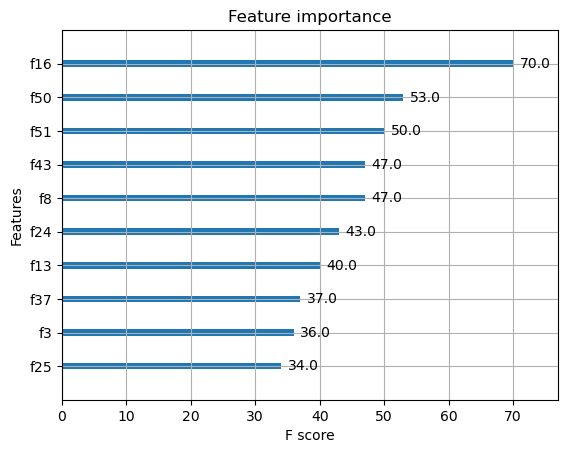

In [62]:
plot_importance(class_arrs[-1]["best_estimator"], max_num_features=10) # top 10 most important features
plt.show()

In [66]:
search_res = list(
            filter(lambda item: item["name"] == "'classifierspolitifact_structural_temporal_linguistic_textual.pkl'", class_arrs))

In [81]:
search_res = list(
            filter(lambda item: item["name"] == "classifierspolitifact_structural_temporal_linguistic_textual.pkl" and item["classifier"] == "GaussianNB", class_arrs))

In [84]:
class_arrs

[{'classifier': 'GaussianNB',
  'model': GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
               param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                             1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                             1e-12, 1e-13, 1e-14, 1e-15]},
               verbose=True),
  'accuracy': 0.7777777777777778,
  'precision': 1.0,
  'recall': 0.5625,
  'f1_score': 0.72,
  'roc_auc': 0.78125,
  'news_source': 'politifact',
  'best_param': {'var_smoothing': 0.01},
  'best_score': 0.7111836734693877,
  'best_estimator': GaussianNB(var_smoothing=0.01),
  'best_index': 0,
  'pred': array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]),
  'name': 'classifierspolitifact_structural_temporal_linguistic_textual_graphical.pkl'},
 {'classifier': 'LogisticRegre

In [76]:
class_arrs[-1]

{'classifier': 'XGBClassifier',
 'model': GridSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=1, colsample_bynode=None,
                                      colsample_bytree=1,
                                      enable_categorical=False, eta=0.3, gamma=0,
                                      gpu_id=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=6, min_child_weight=1,
                                      missing=nan, monotone_constraints=None,
                                      n_estim...
                                      reg_lambda=1, scale_pos_weight=None,
                                      seed=33, subsample=1, tree_method=None,
                                      validate_parameters=None, verbosity=Non